In [6]:
import numpy as np
import pandas as pd 
import math
import matplotlib.pyplot as plt

### Step 1: Read files in as pandas dataframe

In [7]:
# HWSD data frames for partitions 0, 69, 116 
# each partition is a 10km cube within the dosso region
HD0 = pd.read_csv("LCC_HWSD_dosso0")
HD69 = pd.read_csv("LCC_HWSD_dosso69")
HD116 = pd.read_csv("LCC_HWSD_dosso116")

In [8]:
# HWSD data frames for partitions 0, 69, 116 
# each partition is a 10km cube within the dosso region
SG0 = pd.read_csv('LCC_SG_dosso_0_fullresults')
SG69 = pd.read_csv('LCC_SG_dosso_69_fullresults')
SG116 = pd.read_csv('LCC_SG_dosso_116_fullresults')

In [10]:
SG0.columns

Index(['Unnamed: 0', 'Join_Count', 'TARGET_FID', 'gridcode', 'total_p',
       'sand_1', 'sand_2', 'sand_3', 'sand_4', 'sand_5', 'silt_1', 'silt_2',
       'silt_3', 'silt_4', 'silt_5', 'clay_1', 'clay_2', 'clay_3', 'clay_4',
       'clay_5', 'course_fra_1', 'course_fra_2', 'course_fra_3',
       'course_fra_4', 'course_fra_5', 'ph_1', 'ph_2', 'ph_3', 'ph_4', 'ph_5',
       'org_c_cont_1', 'org_c_cont_2', 'org_c_cont_3', 'org_c_cont_4',
       'org_c_cont_5', 'surface_texture', 'top_texture', 'awc1', 'awc2',
       'awc3', 'awc4', 'awc5', 'awc_total', 'slope', 'erosion_risk_LCC',
       'soil_tex_LCC', 'stoniness_LCC', 'perm_LCC', 'awc_LCC', 'lime_LCC',
       'LCC_final', 'LCC_final_noawc', 'limitation', 'limitation_noawc'],
      dtype='object')

In [11]:
smallHD0 = HD0[['T_SAND',
       'T_SILT', 'T_CLAY', 'erosion_risk_LCC', 'soil_tex_LCC',
       'flooding_LCC', 'surface_stoniness_LCC', 'depth_LCC', 'salinity_LCC',
       'lime_LCC', 'perm_LCC', 'T_AWC', 'S_AWC', 'awc_LCC', 'flood_LCC',
        'LCC_final', 'LCC_final_noawc', 'limitation', 'limitation_noawc']]
smallHD69 = HD69[['T_SAND',
       'T_SILT', 'T_CLAY', 'erosion_risk_LCC', 'soil_tex_LCC',
       'flooding_LCC', 'surface_stoniness_LCC', 'depth_LCC', 'salinity_LCC',
       'lime_LCC', 'perm_LCC', 'T_AWC', 'S_AWC', 'awc_LCC', 'flood_LCC',
        'LCC_final', 'LCC_final_noawc', 'limitation', 'limitation_noawc']]
smallHD116 = HD116[['T_SAND',
       'T_SILT', 'T_CLAY', 'erosion_risk_LCC', 'soil_tex_LCC',
       'flooding_LCC', 'surface_stoniness_LCC', 'depth_LCC', 'salinity_LCC',
       'lime_LCC', 'perm_LCC', 'T_AWC', 'S_AWC', 'awc_LCC', 'flood_LCC',
        'LCC_final', 'LCC_final_noawc', 'limitation', 'limitation_noawc']]
smallSG0 = SG0[['sand_1', 'sand_2',  'silt_1', 'silt_2','clay_1', 'clay_2',
        'awc_total', 'erosion_risk_LCC',
       'soil_tex_LCC', 'stoniness_LCC', 'perm_LCC', 'awc_LCC', 'lime_LCC',
       'LCC_final', 'LCC_final_noawc', 'limitation', 'limitation_noawc']]
smallSG69 = SG69[['sand_1', 'sand_2',  'silt_1', 'silt_2','clay_1', 'clay_2',
        'awc_total', 'erosion_risk_LCC',
       'soil_tex_LCC', 'stoniness_LCC', 'perm_LCC', 'awc_LCC', 'lime_LCC',
       'LCC_final', 'LCC_final_noawc', 'limitation', 'limitation_noawc']]
smallSG116 = SG116[['sand_1', 'sand_2',  'silt_1', 'silt_2','clay_1', 'clay_2',
        'awc_total', 'erosion_risk_LCC',
       'soil_tex_LCC', 'stoniness_LCC', 'perm_LCC', 'awc_LCC', 'lime_LCC',
       'LCC_final', 'LCC_final_noawc', 'limitation', 'limitation_noawc']]

In [12]:
smallHD0.to_excel("LCC_HWSD_dosso0x.xlsx")
smallHD69.to_excel("LCC_HWSD_dosso69x.xlsx")
smallHD116.to_excel("LCC_HWSD_dosso116x.xlsx")
smallSG0.to_excel('LCC_SG_dosso_0_fullresultsx.xlsx')
smallSG69.to_excel('LCC_SG_dosso_69_fullresultsx.xlsx')
smallSG116.to_excel('LCC_SG_dosso_116_fullresultsx.xlsx')

### Step 2: Explore the data frames and their structure 
<br>
<br>
        replace any of the column names (ex. 'clay1', 'T_CLAY') with other column names to change the exploration
<br>
<br>
        replace dataframe names (ex. SG0, HD69) with other dataframes to change exploration 
<br>
<br>
        Each row in the dataframes is a 12.5m pixel within the 10km partition of the dosso region 
<br>
<br>
        Maximum number of rows per dataframe is 640,000, if dataframe has less rows then the ~10k partition has been clipped 
        by the dosso boundary and thus isn't a perfect square
<br>
<br>
        Topsoil defined as 0-30cm, subsoil defined as 30-100cm 


In [4]:
# .head() function will print out the first 5 rows of a pandas dataframe
SG0.head()

,Unnamed: 0,Unnamed: 0.1,Join_Count,TARGET_FID,bulk_dens1,cec1,clay1,course_fra1,silt1,sand1,...,LCC_final6,awc_total,awc_T,awc_S,awc_LCC_final,LCC_topsoil,LCC_subsoil,T_limitation,S_limitation,slope
0,0,0,6,0,1475.0,3.0,6.0,0.0,10.0,83.0,...,2,6.095666,1.889199,4.206468,3,3,3,3s-a,3s-a,2.5606
1,1,1,3,1,1485.0,4.0,6.0,0.0,9.0,85.0,...,2,5.748704,1.703051,4.045653,4,4,4,4s-a,4s-a,0.0000
2,2,2,6,2,1486.0,4.0,9.0,0.0,8.0,84.0,...,1,6.181746,1.749650,4.432096,3,3,3,3s-a,3s-a,3.2376
3,3,3,8,3,1490.0,3.0,7.0,0.0,7.0,84.0,...,1,5.947393,1.705431,4.241963,4,4,4,4s-a,4s-a,4.5739
4,4,4,8,4,1473.0,4.0,6.0,0.0,8.0,88.0,...,2,5.112841,1.595222,3.517619,4,4,4,4s-a,4s-a,4.7140


In [5]:
# print out a list of the columns of the dataframe with .columns
# length is the number of columns in the dataframe
SG0.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Join_Count', 'TARGET_FID', 'bulk_dens1',
       'cec1', 'clay1', 'course_fra1', 'silt1', 'sand1',
       ...
       'LCC_final6', 'awc_total', 'awc_T', 'awc_S', 'awc_LCC_final',
       'LCC_topsoil', 'LCC_subsoil', 'T_limitation', 'S_limitation', 'slope'],
      dtype='object', length=108)

In [6]:
# subset a dataframe by referencing it's column headers using brackets, you can use .head() to print first five entries 
SG0['clay1'].head()

0    6.0
1    6.0
2    9.0
3    7.0
4    6.0
Name: clay1, dtype: float64

In [7]:
# subset a dataframe by choosing rows with specific values by using double bracket structure
# the following line of code reads "give me all of the rows in my dataframe where the clay content in the first hoizon is 
# greater han or equal to 10%"
# note the number of rows with this specification at the bottom of the output cell
SG116[SG116['clay1'] >= 10]

,Unnamed: 0,Unnamed: 0.1,Join_Count,TARGET_FID,bulk_dens1,cec1,clay1,course_fra1,silt1,sand1,...,LCC_final6,awc_total,awc_T,awc_S,awc_LCC_final,LCC_topsoil,LCC_subsoil,T_limitation,S_limitation,slope
0,0,0,3,0,1495.0,5.0,12.0,0.0,18.0,74.0,...,1,7.977081,2.322565,5.654517,3,3,3,3s-a,3s-a,2.9189
1,1,1,4,1,1491.0,5.0,13.0,0.0,18.0,73.0,...,1,8.178668,2.306547,5.872120,3,3,3,3s-a,3s-a,2.5606
2,2,2,4,2,1478.0,5.0,13.0,0.0,18.0,69.0,...,1,8.695648,2.432277,6.263370,3,3,3,3s-a,3s-a,2.4293
3,3,3,2,3,1479.0,5.0,13.0,0.0,16.0,71.0,...,1,7.964487,2.329496,5.634991,3,3,3,3s-a,3s-a,1.8112
4,4,4,2,4,1478.0,5.0,13.0,0.0,17.0,69.0,...,1,7.946293,2.358244,5.588049,3,3,3,3s-a,3s-a,0.8102
5,5,5,4,5,1485.0,4.0,12.0,0.0,18.0,74.0,...,1,7.928906,2.290446,5.638460,3,3,3,3s-a,3s-a,2.2906
6,6,6,4,6,1479.0,3.0,11.0,0.0,19.0,73.0,...,2,7.441297,2.233830,5.207466,3,3,3,3s-a,3s-a,6.5046
8,10,10,4,10,1465.0,6.0,13.0,0.0,18.0,69.0,...,1,8.813062,2.569919,6.243144,3,3,3,3s-a,3s-a,2.5606
11,13,13,1,13,1478.0,5.0,13.0,0.0,18.0,69.0,...,1,8.695648,2.432277,6.263370,3,3,3,3s-a,3s-a,0.0000
12,14,14,4,14,1478.0,5.0,13.0,0.0,18.0,69.0,...,1,8.695648,2.432277,6.263370,3,3,3,3s-a,3s-a,0.8102


In [8]:
# look at the breakdown of column values by using .value_counts()
SG0['clay1'].value_counts()

6.0     163133
10.0     97754
8.0      91532
9.0      82080
7.0      74500
11.0     59855
12.0     31450
13.0     31177
15.0      4483
5.0       4036
Name: clay1, dtype: int64

## Step 3: Descriptive Statistics and Exploration 
#### Change dataframe names and column names as desired!

### Texture

In [4]:
# Investigate average texture differences between SoilGrids and HWSD
# .mean() takes the average over all rows in the dataframe or subset of the dataframe

# TOGGLE THIS CODE BY CHANGING PARTITION NUMBER AND DATAFRAMES OF INTEREST
# PARTITION
partition = "116"
# SOIL GRID DATAFRAME
SG_df = SG116
# HWSD dATAFRAME
HD_df = HD116



#****************************************************************************************************************************
# LEAVE THIS CODE
print ("SoilGrid Mean Clay Content - Partition "+ partition)
print ("clay content 0cm horizon:", SG_df['clay1'].mean() ,"\n"
       "clay content 5cm horizon:", SG_df['clay2'].mean() ,"\n"
       "clay content 15cm horizon:", SG_df['clay3'].mean() ,"\n"
       "clay content 30cm horizon:", SG_df['clay4'].mean() ,"\n"
       "clay content 60cm horizon:", SG_df['clay5'].mean() ,"\n"
       "clay content 100cm horizon:", SG_df['clay6'].mean() ,"\n")
print ("HWSD Mean Clay Content - Partitiion "+ partition)
print ("clay content topsoil:", HD_df['T_CLAY'].mean() ,"\n"
       "clay content subsoil:", HD_df['S_CLAY'].mean(),"\n")
print ("SoilGrid Mean Sand Content - Partition "+ partition)
print ("sand content 0cm horizon:", SG_df['sand1'].mean() ,"\n"
       "sand content 5cm horizon:", SG_df['sand2'].mean() ,"\n"
       "sand content 15cm horizon:", SG_df['sand3'].mean() ,"\n"
       "sand content 30cm horizon:", SG_df['sand4'].mean() ,"\n"
       "sand content 60cm horizon:", SG_df['sand5'].mean() ,"\n"
       "sand content 100cm horizon:", SG_df['sand6'].mean() ,"\n")
print ("HWSD Mean Sand Content - Partition "+ partition)
print ("sand content topsoil:", HD_df['T_SAND'].mean() ,"\n"
       "sand content subsoil:", HD_df['S_SAND'].mean() ,"\n")
print ("SoilGrid Mean Silt Content - Partition "+ partition)
print ("silt content 0cm horizon:", SG_df['silt1'].mean() ,"\n"
       "silt content 5cm horizon:", SG_df['silt2'].mean() ,"\n"
       "silt content 15cm horizon:", SG_df['silt3'].mean() ,"\n"
       "silt content 30cm horizon:", SG_df['silt4'].mean() ,"\n"
       "silt content 60cm horizon:", SG_df['silt5'].mean() ,"\n"
       "silt content 100cm horizon:", SG_df['silt6'].mean() ,"\n")
print ("HWSD Mean Sand Content - Partition "+ partition)
print ("silt content topsoil:", HD_df['T_SILT'].mean() ,"\n"
       "silt content subsoil:", HD_df['S_SILT'].mean() ,"\n")

SoilGrid Mean Clay Content - Partition 116


KeyError: 'clay1'

In [10]:
# Investigate average texture differences between SoilGrids and HWSD
# .var() takes the unbiased variance over all rows in the dataframe or subset of the dataframe

# TOGGLE THIS CODE BY CHANGING PARTITION NUMBER AND DATAFRAMES OF INTEREST
# PARTITION
partition = "116"
# SOIL GRID DATAFRAME
SG_df = SG116
# HWSD dATAFRAME
HD_df = HD116



#****************************************************************************************************************************
# LEAVE THIS CODE
print ("SoilGrid Clay Content Variance - Partition "+ partition)
print ("clay content 0cm horizon:", SG_df['clay1'].var() ,"\n"
       "clay content 5cm horizon:", SG_df['clay2'].var() ,"\n"
       "clay content 15cm horizon:", SG_df['clay3'].var() ,"\n"
       "clay content 30cm horizon:", SG_df['clay4'].var() ,"\n"
       "clay content 60cm horizon:", SG_df['clay5'].var() ,"\n"
       "clay content 100cm horizon:", SG_df['clay6'].var() ,"\n")
print ("HWSD Clay Content Variance - Partitiion "+ partition)
print ("clay content topsoil:", HD_df['T_CLAY'].var() ,"\n"
       "clay content subsoil:", HD_df['S_CLAY'].var(),"\n")
print ("SoilGrid Sand Content Variance - Partition "+ partition)
print ("sand content 0cm horizon:", SG_df['sand1'].var() ,"\n"
       "sand content 5cm horizon:", SG_df['sand2'].var() ,"\n"
       "sand content 15cm horizon:", SG_df['sand3'].var() ,"\n"
       "sand content 30cm horizon:", SG_df['sand4'].var() ,"\n"
       "sand content 60cm horizon:", SG_df['sand5'].var() ,"\n"
       "sand content 100cm horizon:", SG_df['sand6'].var() ,"\n")
print ("HWSD Sand Content Variance - Partition "+ partition)
print ("sand content topsoil:", HD_df['T_SAND'].var() ,"\n"
       "sand content subsoil:", HD_df['S_SAND'].var() ,"\n")
print ("SoilGrid Silt Content Variance - Partition "+ partition)
print ("silt content 0cm horizon:", SG_df['silt1'].var() ,"\n"
       "silt content 5cm horizon:", SG_df['silt2'].var() ,"\n"
       "silt content 15cm horizon:", SG_df['silt3'].var() ,"\n"
       "silt content 30cm horizon:", SG_df['silt4'].var() ,"\n"
       "silt content 60cm horizon:", SG_df['silt5'].var() ,"\n"
       "silt content 100cm horizon:", SG_df['silt6'].var() ,"\n")
print ("HWSD Sand Content Variance - Partition "+ partition)
print ("silt content topsoil:", HD_df['T_SILT'].var() ,"\n"
       "silt content subsoil:", HD_df['S_SILT'].var() ,"\n")

SoilGrid Clay Content Variance - Partition 116
clay content 0cm horizon: 3.863161882107836 
clay content 5cm horizon: 3.754851735130805 
clay content 15cm horizon: 7.430282969953943 
clay content 30cm horizon: 5.144366897416586 
clay content 60cm horizon: 10.588151558827677 
clay content 100cm horizon: 5.786532887629346 

HWSD Clay Content Variance - Partitiion 116
clay content topsoil: 1.8406628058054335 
clay content subsoil: 11.504142536295982 

SoilGrid Sand Content Variance - Partition 116
sand content 0cm horizon: 4.134872166794162 
sand content 5cm horizon: 3.8673324114968697 
sand content 15cm horizon: 10.005039539132522 
sand content 30cm horizon: 4.647641723952671 
sand content 60cm horizon: 11.962131138269202 
sand content 100cm horizon: 6.970495493651315 

HWSD Sand Content Variance - Partition 116
sand content topsoil: 11.504142536295982 
sand content subsoil: 22.548119371086784 

SoilGrid Silt Content Variance - Partition 116
silt content 0cm horizon: 1.2056896499823395 


### PH

In [7]:
# Investigate average ph differences between SoilGrids and HWSD
# .mean() takes the average over all rows in the dataframe or subset of the dataframe

# TOGGLE THIS CODE BY CHANGING PARTITION NUMBER AND DATAFRAMES OF INTEREST
# PARTITION
partition = "69"
# SOIL GRID DATAFRAME
SG_df = SG69
# HWSD dATAFRAME
HD_df = HD69


#****************************************************************************************************************************
# LEAVE THIS CODE
print ("SoilGrid Mean PH Value - Partition "+ partition)
print ("PH value 0cm -5cm horizon:", SG_df['ph_1'].mean() ,"\n"
       "PH value 5cm-15cm horizon:", SG_df['ph_2'].mean() ,"\n"
       "PH value 15cm-30cm horizon:", SG_df['ph_3'].mean() ,"\n"
       "PH value 30cm-60cm horizon:", SG_df['ph_4'].mean() ,"\n"
       "PH value 60cm-100cm horizon:", SG_df['ph_5'].mean() ,"\n")
print ("HWSD Mean PH Value - Partitiion "+ partition)
print ("PH value topsoil:", HD_df['T_PH_H2O'].mean() ,"\n"
       "PH value subsoil:", HD_df['S_PH_H2O'].mean(),"\n")

SoilGrid Mean PH Value - Partition 69
PH value 0cm -5cm horizon: 5.563467681652021 
PH value 5cm-15cm horizon: 5.505160861271905 
PH value 15cm-30cm horizon: 5.49047431111159 
PH value 30cm-60cm horizon: 5.500999743354068 
PH value 60cm-100cm horizon: 5.553696960013677 

HWSD Mean PH Value - Partitiion 69
PH value topsoil: 5.91088152065999 
PH value subsoil: 5.851420883373205 



### AWC using LandPKS algorithm

In [8]:
SG0.columns

Index(['Unnamed: 0', 'Join_Count', 'TARGET_FID', 'gridcode', 'total_p',
       'sand_1', 'sand_2', 'sand_3', 'sand_4', 'sand_5', 'silt_1', 'silt_2',
       'silt_3', 'silt_4', 'silt_5', 'clay_1', 'clay_2', 'clay_3', 'clay_4',
       'clay_5', 'course_fra_1', 'course_fra_2', 'course_fra_3',
       'course_fra_4', 'course_fra_5', 'ph_1', 'ph_2', 'ph_3', 'ph_4', 'ph_5',
       'org_c_cont_1', 'org_c_cont_2', 'org_c_cont_3', 'org_c_cont_4',
       'org_c_cont_5', 'surface_texture', 'top_texture', 'awc1', 'awc2',
       'awc3', 'awc4', 'awc5', 'awc_total', 'slope', 'erosion_risk_LCC',
       'soil_tex_LCC', 'stoniness_LCC', 'perm_LCC', 'awc_LCC', 'lime_LCC',
       'LCC_final', 'LCC_final_noawc', 'limitation', 'limitation_noawc'],
      dtype='object')

In [11]:
# Investigate average available water holding capacity differences between SoilGrids and HWSD
# .mean() takes the average over all rows in the dataframe or subset of the dataframe

# TOGGLE THIS CODE BY CHANGING PARTITION NUMBER AND DATAFRAMES OF INTEREST
# PARTITION
partition ="0"
# SOIL GRID DATAFRAME
SG_df = SG0
# HWSD dATAFRAME
HD_df = HD0

#****************************************************************************************************************************
# LEAVE THIS CODE
print ("SoilGrid Mean AWC Value - Partition "+ partition)
print ("AWC value 0cm -5cm horizon:", SG_df['awc1'].mean() ,"\n"
       "AWC value 5cm-15cm horizon:", SG_df['awc2'].mean() ,"\n"
       "AWC value 15cm-30cm horizon:", SG_df['awc3'].mean() ,"\n"
       "AWC value 30cm-60cm horizon:", SG_df['awc4'].mean() ,"\n"
       "AWC value 60cm-100cm horizon:", SG_df['awc5'].mean() ,"\n")
print ("HWSD Mean AWC Value - Partitiion "+ partition)
print ("AWC value topsoil:", HD_df['T_AWC'].mean() ,"\n"
       "AWC value subsoil:", HD_df['S_AWC'].mean(),"\n")

SoilGrid Mean AWC Value - Partition 0
AWC value 0cm -5cm horizon: 0.058822350216944735 
AWC value 5cm-15cm horizon: 0.057962840841458606 
AWC value 15cm-30cm horizon: 0.06250074618021743 
AWC value 30cm-60cm horizon: 0.06531382197062421 
AWC value 60cm-100cm horizon: 0.06498828350683225 

HWSD Mean AWC Value - Partitiion 0
AWC value topsoil: 0.03965923532449285 
AWC value subsoil: 0.04273698840086269 



### Difference between AWC from HWSD classification vs. AWC calculated with LandPKS algorithm

In [27]:
# Investigate average available water holding capacity differences between SoilGrids and HWSD
# .mean() takes the average over all rows in the dataframe or subset of the dataframe

# TOGGLE THIS CODE BY CHANGING PARTITION NUMBER AND DATAFRAMES OF INTEREST
# PARTITION
partition = "69"
# HWSD dATAFRAME
HD_df = HD69


#****************************************************************************************************************************
# LEAVE THIS CODE
print ("HWSD Mean AWC Value - Partition "+ partition)
print ("AWC value topsoil:", HD_df['T_AWC'].mean() ,"\n"
       "AWC value subsoil:", HD_df['S_AWC'].mean(),"\n")
print ("LandPKS Mean AWC Value - Partitiion "+ partition)
print ("AWC value topsoil:", HD_df['T_LAWC'].mean() ,"\n"
       "AWC value subsoil:", HD_df['S_LAWC'].mean(),"\n")

HWSD Mean AWC Value - Partition 69
AWC value topsoil: 3.5762810506768576 
AWC value subsoil: 8.344655784912668 

LandPKS Mean AWC Value - Partitiion 69
AWC value topsoil: 1.6616614119461266 
AWC value subsoil: 4.321015742019717 



### Final LCC Values HWSD vs. SoilGrids

In [14]:
# Investigate average LCC classification differences between SoilGrids and HWSD
# .mean() takes the average over all rows in the dataframe or subset of the dataframe

# TOGGLE THIS CODE BY CHANGING PARTITION NUMBER AND DATAFRAMES OF INTEREST
# PARTITION
partition = "116"
# HWSD dATAFRAME
HD_df = HD116
# SoilGrid dATAFRAME
SG_df = SG116


#****************************************************************************************************************************
# LEAVE THIS CODE
print ("HWSD Mean LCC Value - Partition "+ partition)
print ("LCC value topsoil:", HD_df['LCC_final_T'].mean() ,"\n"
       "LCC value subsoil:", HD_df['LCC_final_S'].mean(),"\n")
print ("SoilGrids Mean LCC Value - Partitiion "+ partition)
print ("LCC value topsoil:", SG_df['LCC_topsoil'].mean() ,"\n"
       "LCC value subsoil:", SG_df['LCC_subsoil'].mean(),"\n")

HWSD Mean LCC Value - Partition 116
LCC value topsoil: 3.7561257944440234 
LCC value subsoil: 3.747196215885367 

SoilGrids Mean LCC Value - Partitiion 116
LCC value topsoil: 3.005451314473166 
LCC value subsoil: 3.005451314473166 



In [13]:
SG0.columns

Index(['Unnamed: 0', 'Join_Count', 'TARGET_FID', 'gridcode', 'total_p',
       'sand_1', 'sand_2', 'sand_3', 'sand_4', 'sand_5', 'silt_1', 'silt_2',
       'silt_3', 'silt_4', 'silt_5', 'clay_1', 'clay_2', 'clay_3', 'clay_4',
       'clay_5', 'course_fra_1', 'course_fra_2', 'course_fra_3',
       'course_fra_4', 'course_fra_5', 'ph_1', 'ph_2', 'ph_3', 'ph_4', 'ph_5',
       'org_c_cont_1', 'org_c_cont_2', 'org_c_cont_3', 'org_c_cont_4',
       'org_c_cont_5', 'surface_texture', 'top_texture', 'awc1', 'awc2',
       'awc3', 'awc4', 'awc5', 'awc_total', 'slope', 'erosion_risk_LCC',
       'soil_tex_LCC', 'stoniness_LCC', 'perm_LCC', 'awc_LCC', 'lime_LCC',
       'LCC_final', 'LCC_final_noawc', 'limitation', 'limitation_noawc'],
      dtype='object')

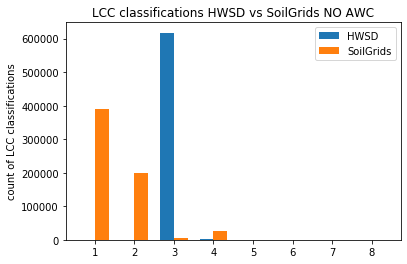

In [21]:
# Compare the differences in topsoil LCC classifications from HWSD vs SoilGrids for each partition

# TOGGLE THIS CODE BY CHANGING PARTITION NUMBER AND DATAFRAMES OF INTEREST
# PARTITION
partition = "69"
# HWSD dATAFRAME
HD_df = HD69
# SoilGrid dATAFRAME
SG_df = SG69


#****************************************************************************************************************************
# LEAVE THIS CODE
N = 8
HWSD_LCC_T = [len(HD_df[HD_df['LCC_final_noawc'] == 1]), len(HD_df[HD_df['LCC_final_noawc'] == 2]), len(HD_df[HD_df['LCC_final_noawc'] == 3]), len(HD_df[HD_df['LCC_final_noawc'] == 4]), len(HD_df[HD_df['LCC_final_noawc'] == 5]), len(HD_df[HD_df['LCC_final_noawc'] == 6]), len(HD_df[HD_df['LCC_final_noawc'] == 7]), len(HD_df[HD_df['LCC_final_noawc'] == 8])]
SG_LCC_T = [len(SG_df[SG_df['LCC_final_noawc'] == 1]), len(SG_df[SG_df['LCC_final_noawc'] == 2]), len(SG_df[SG_df['LCC_final_noawc'] == 3]), len(SG_df[SG_df['LCC_final_noawc'] == 4]), len(SG_df[SG_df['LCC_final_noawc'] == 5]), len(SG_df[SG_df['LCC_final_noawc'] == 6]), len(SG_df[SG_df['LCC_final_noawc'] == 7]), len(SG_df[SG_df['LCC_final_noawc'] == 8])]

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, HWSD_LCC_T, width, label='HWSD')
plt.bar(ind + width, SG_LCC_T, width,
    label='SoilGrids')

plt.ylabel('count of LCC classifications')
plt.title('LCC classifications HWSD vs SoilGrids NO AWC')

plt.xticks(ind + width / 2, range(1,9))
plt.legend(loc='best')
plt.show()

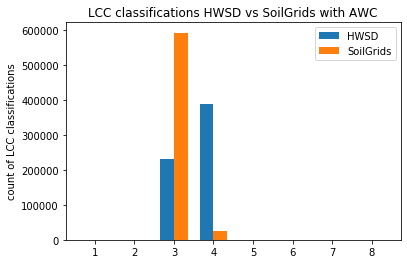

In [22]:
# Compare the differences in topsoil LCC classifications from HWSD vs SoilGrids for each partition

# TOGGLE THIS CODE BY CHANGING PARTITION NUMBER AND DATAFRAMES OF INTEREST
# PARTITION
partition = "69"
# HWSD dATAFRAME
HD_df = HD69
# SoilGrid dATAFRAME
SG_df = SG69


#****************************************************************************************************************************
# LEAVE THIS CODE
N = 8
HWSD_LCC_T = [len(HD_df[HD_df['LCC_final'] == 1]), len(HD_df[HD_df['LCC_final'] == 2]), len(HD_df[HD_df['LCC_final'] == 3]), len(HD_df[HD_df['LCC_final'] == 4]), len(HD_df[HD_df['LCC_final'] == 5]), len(HD_df[HD_df['LCC_final'] == 6]), len(HD_df[HD_df['LCC_final'] == 7]), len(HD_df[HD_df['LCC_final'] == 8])]
SG_LCC_T = [len(SG_df[SG_df['LCC_final'] == 1]), len(SG_df[SG_df['LCC_final'] == 2]), len(SG_df[SG_df['LCC_final'] == 3]), len(SG_df[SG_df['LCC_final'] == 4]), len(SG_df[SG_df['LCC_final'] == 5]), len(SG_df[SG_df['LCC_final'] == 6]), len(SG_df[SG_df['LCC_final'] == 7]), len(SG_df[SG_df['LCC_final'] == 8])]

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, HWSD_LCC_T, width, label='HWSD')
plt.bar(ind + width, SG_LCC_T, width,
    label='SoilGrids')

plt.ylabel('count of LCC classifications')
plt.title('LCC classifications HWSD vs SoilGrids with AWC')

plt.xticks(ind + width / 2, range(1,9))
plt.legend(loc='best')
plt.show()

### Final LCC Limitations HWSD vs. SoilGrids

Limitations are structured as follows: LCC class + LCC subclass (the subclass with most limiting LCC value) 
<br>
<br>
In the case that multiple subclasses have the same limiting LCC value, then the subclasses are coded one after another 
<br>
<br>
Subclasses: 
<br>
Erosion (e)
<br>        
Soils (s) - Depth (d), texture (t), salinity (k), available water capacity (a), landpks available water (La), lime (l)
<br>        
Wetness (w) - water table depth (w), permeability (p)

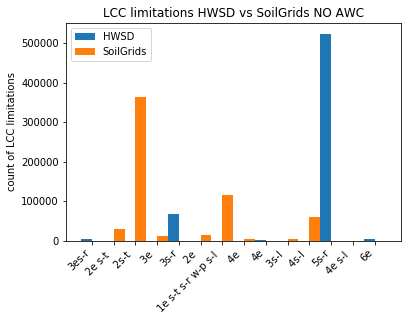

In [36]:
# Compare the differences in topsoil LCC limitations from HWSD vs SoilGrids for each partition

# TOGGLE THIS CODE BY CHANGING PARTITION NUMBER AND DATAFRAMES OF INTEREST
# PARTITION
# HWSD dATAFRAME
HD_df = HD116
# SoilGrid dATAFRAME
SG_df = SG116


#****************************************************************************************************************************
# LEAVE THIS CODE
limitations = list(SG_df['limitation_noawc'].unique()) + list(HD_df['limitation_noawc'].unique())
unique_lims = list(set(limitations))

countSG = []
countHD = []
for i in range(len(unique_lims)):
    countSG += [len(SG_df[SG_df['limitation_noawc'] == unique_lims[i]])]
    countHD += [len(HD_df[HD_df['limitation_noawc'] == unique_lims[i]])]
    
    
# LEAVE THIS CODE
N = len(unique_lims)
HWSD_lim_T = countHD
SG_lim_T = countSG

ind = np.arange(N) 
width = 0.5      
plt.bar(ind, HWSD_lim_T, width, label='HWSD')
plt.bar(ind + width, SG_lim_T, width,
    label='SoilGrids')

plt.ylabel('count of LCC limitations')
plt.title('LCC limitations HWSD vs SoilGrids NO AWC')

plt.xticks( ind + width / 2, unique_lims, rotation=45, horizontalalignment='right')
plt.legend(loc='best')
plt.show()

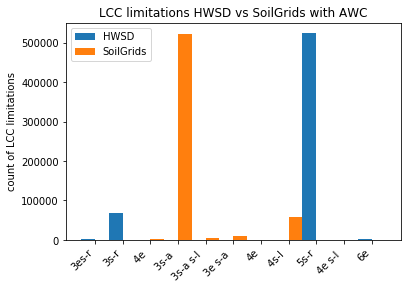

In [37]:
# Compare the differences in subsoil LCC limitations from HWSD vs SoilGrids for each partition

# TOGGLE THIS CODE BY CHANGING PARTITION NUMBER AND DATAFRAMES OF INTEREST
# PARTITION
# HWSD dATAFRAME
HD_df = HD116
# SoilGrid dATAFRAME
SG_df = SG116


#****************************************************************************************************************************
# LEAVE THIS CODE
limitations = list(SG_df['limitation'].unique()) + list(HD_df['limitation'].unique())
unique_lims = list(set(limitations))

countSG = []
countHD = []
for i in range(len(unique_lims)):
    countSG += [len(SG_df[SG_df['limitation'] == unique_lims[i]])]
    countHD += [len(HD_df[HD_df['limitation'] == unique_lims[i]])]
    
    
# LEAVE THIS CODE
N = len(unique_lims)
HWSD_lim_T = countHD
SG_lim_T = countSG

ind = np.arange(N) 
width = 0.5      
plt.bar(ind, HWSD_lim_T, width, label='HWSD')
plt.bar(ind + width, SG_lim_T, width,
    label='SoilGrids')

plt.ylabel('count of LCC limitations')
plt.title('LCC limitations HWSD vs SoilGrids with AWC')

plt.xticks( ind + width / 2, unique_lims, rotation=45, horizontalalignment='right')
plt.legend(loc='best')
plt.show()